<a href="https://colab.research.google.com/github/11SST11/Restro-Recommendation-TriCitiesDNG/blob/main/RestaurentRecIndian.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


file_path = '/content/zomato.csv'
zoma_dataset = pd.read_csv(file_path, encoding='ISO-8859-1')

In [2]:
zoma_dataset.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [3]:
zoma_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

In [4]:
zoma_dataset.describe()

,Restaurant ID,Country Code,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes
count,9.551000e+03,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000
mean,9.051128e+06,18.365616,64.126574,25.854381,1199.210763,1.804837,2.666370,156.909748
std,8.791521e+06,56.750546,41.467058,11.007935,16121.183073,0.905609,1.516378,430.169145
min,5.300000e+01,1.000000,-157.948486,-41.330428,0.000000,1.000000,0.000000,0.000000
25%,3.019625e+05,1.000000,77.081343,28.478713,250.000000,1.000000,2.500000,5.000000
50%,6.004089e+06,1.000000,77.191964,28.570469,400.000000,2.000000,3.200000,31.000000
75%,1.835229e+07,1.000000,77.282006,28.642758,700.000000,2.000000,3.700000,131.000000
max,1.850065e+07,216.000000,174.832089,55.976980,800000.000000,4.000000,4.900000,10934.000000


In [5]:
zoma_dataset.shape

(9551, 21)

# **Data Preperation and cleaning**

## Removing Duplicates (removing if any)

In [6]:
zoma_data_cleaned = zoma_dataset.drop_duplicates()

In [7]:
zoma_data_cleaned.shape

(9551, 21)

Fill missing values in 'Cuisines' with 'Unknown'

In [8]:
# zoma_data_cleaned['Cuisines'].fillna('Unknown', inplace=True)

# Modify the column without using inplace, and then assign it back
zoma_data_cleaned['Cuisines'] = zoma_data_cleaned['Cuisines'].fillna('Unknown')


In [9]:
print(zoma_data_cleaned.isnull().sum())


Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                0
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64


In [10]:
print(zoma_data_cleaned.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9551 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

In [11]:
zoma_data_cleaned.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


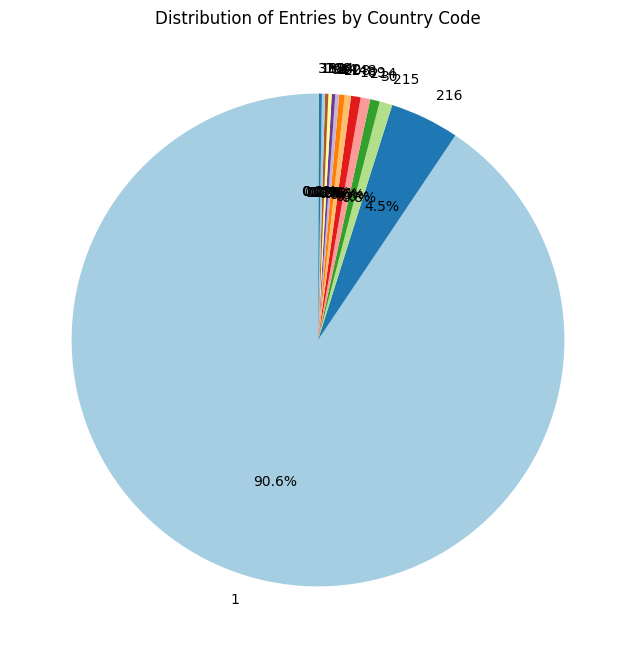

In [12]:
country_distribution = zoma_data_cleaned['Country Code'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(country_distribution, labels=country_distribution.index, autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)

# Add a title
plt.title('Distribution of Entries by Country Code')

# Display the chart
plt.show()

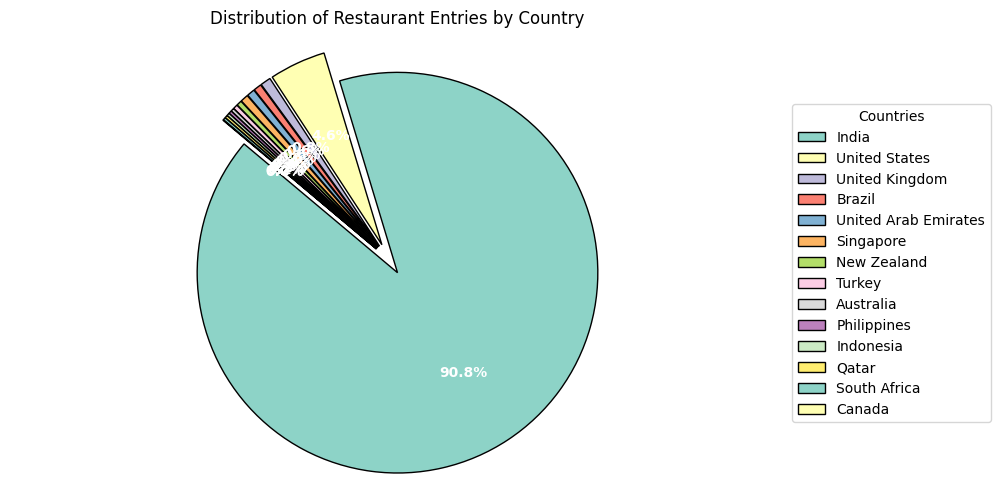

In [13]:
country_code_mapping = {
    1: 'India',
    14: 'Australia',
    30: 'Brazil',
    37: 'Canada',
    94: 'Indonesia',
    148: 'New Zealand',
    162: 'Philippines',
    166: 'Qatar',
    189: 'Singapore',
    191: 'South Africa',
    208: 'Turkey',
    214: 'United Arab Emirates',
    215: 'United Kingdom',
    216: 'United States'
}
zoma_data_cleaned['Country'] = zoma_data_cleaned['Country Code'].map(country_code_mapping)
country_counts = zoma_data_cleaned['Country'].value_counts()

explode = [0.08] * len(country_counts)  # Separate all slices slightly for better visibility
colors = plt.cm.Set3.colors  # Use a predefined colormap for more appealing colors

plt.figure(figsize=(10, 6))
wedges, texts, autotexts = plt.pie(
    country_counts,
    explode=explode,
    labels=None,  # Remove labels from the slices
    autopct='%1.1f%%',  # Show percentages
    startangle=140,
    colors=colors,
    wedgeprops={'edgecolor': 'black'}
)

# Add a legend instead of labels to avoid overlap
plt.legend(wedges, country_counts.index, title="Countries", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

# Customize the autotext (percentages inside the pie chart)
plt.setp(autotexts, size=10, weight="bold", color="white")

# Title and equal aspect ratio to ensure pie chart is circular
plt.title('Distribution of Restaurant Entries by Country')
plt.axis('equal')
plt.show()

In [14]:
zoma_data_cleaned.shape

(9551, 22)

In [15]:
country_table = pd.DataFrame({'Country': country_counts.index, 'Number of Entries': country_counts.values})
print(country_table)

                 Country  Number of Entries
0                  India               8652
1          United States                434
2         United Kingdom                 80
3                 Brazil                 60
4   United Arab Emirates                 60
5              Singapore                 60
6            New Zealand                 40
7                 Turkey                 34
8              Australia                 24
9            Philippines                 22
10             Indonesia                 21
11                 Qatar                 20
12          South Africa                 20
13                Canada                  4


## **Keeping only the India enteries**

In [16]:
df_data_india = zoma_data_cleaned[zoma_data_cleaned['Country'] == 'India']

# Resetting index for better usability after filtering
df_data_india = df_data_india.reset_index(drop=True)

# Display the number of entries for India
print(f"Number of entries for India: {len(df_data_india)}")


Number of entries for India: 8652


In [17]:
df_data_india.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
0,3400025,Jahanpanah,1,Agra,"E 23, Shopping Arcade, Sadar Bazaar, Agra Cant...",Agra Cantt,"Agra Cantt, Agra",78.011544,27.161661,"North Indian, Mughlai",...,No,No,No,No,3,3.9,Yellow,Good,140,India
1,3400341,Rangrezz Restaurant,1,Agra,"E-20, Shopping Arcade, Sadar Bazaar, Agra Cant...",Agra Cantt,"Agra Cantt, Agra",0.000000,0.000000,"North Indian, Mughlai",...,No,No,No,No,2,3.5,Yellow,Good,71,India
2,3400005,Time2Eat - Mama Chicken,1,Agra,"Main Market, Sadar Bazaar, Agra Cantt, Agra",Agra Cantt,"Agra Cantt, Agra",78.011608,27.160832,North Indian,...,No,No,No,No,2,3.6,Yellow,Good,94,India
3,3400021,Chokho Jeeman Marwari Jain Bhojanalya,1,Agra,"1/48, Delhi Gate, Station Road, Raja Mandi, Ci...",Civil Lines,"Civil Lines, Agra",77.998092,27.195928,Rajasthani,...,No,No,No,No,2,4.0,Green,Very Good,87,India
4,3400017,Pinch Of Spice,1,Agra,"23/453, Opposite Sanjay Cinema, Wazipura Road,...",Civil Lines,"Civil Lines, Agra",78.007553,27.201725,"North Indian, Chinese, Mughlai",...,No,No,No,No,3,4.2,Green,Very Good,177,India


In [18]:
df_data_india.shape

(8652, 22)

Redundant to keep Rating color

In [19]:
df_data_india = df_data_india.drop(columns=['Rating color'])

# Display the updated DataFrame structure to confirm the column is removed
df_data_india.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8652 entries, 0 to 8651
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         8652 non-null   int64  
 1   Restaurant Name       8652 non-null   object 
 2   Country Code          8652 non-null   int64  
 3   City                  8652 non-null   object 
 4   Address               8652 non-null   object 
 5   Locality              8652 non-null   object 
 6   Locality Verbose      8652 non-null   object 
 7   Longitude             8652 non-null   float64
 8   Latitude              8652 non-null   float64
 9   Cuisines              8652 non-null   object 
 10  Average Cost for two  8652 non-null   int64  
 11  Currency              8652 non-null   object 
 12  Has Table booking     8652 non-null   object 
 13  Has Online delivery   8652 non-null   object 
 14  Is delivering now     8652 non-null   object 
 15  Switch to order menu 

Dropping columns which are no longer a necessary

In [20]:
columns_to_drop = [ 'Switch to order menu', 'Is delivering now',
                   'Has Table booking', 'Has Online delivery',
                   'Country Code', 'Country']

dtf_india_cleaned = df_data_india.drop(columns=columns_to_drop)

# Display the remaining columns
print("Remaining columns after cleaning:")
print(dtf_india_cleaned.columns)

Remaining columns after cleaning:
Index(['Restaurant ID', 'Restaurant Name', 'City', 'Address', 'Locality',
       'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Price range', 'Aggregate rating',
       'Rating text', 'Votes'],
      dtype='object')


In [21]:
dtf_india_cleaned.shape

(8652, 15)

In [22]:
dtf_india_cleaned.head()

,Restaurant ID,Restaurant Name,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Price range,Aggregate rating,Rating text,Votes
0,3400025,Jahanpanah,Agra,"E 23, Shopping Arcade, Sadar Bazaar, Agra Cant...",Agra Cantt,"Agra Cantt, Agra",78.011544,27.161661,"North Indian, Mughlai",850,Indian Rupees(Rs.),3,3.9,Good,140
1,3400341,Rangrezz Restaurant,Agra,"E-20, Shopping Arcade, Sadar Bazaar, Agra Cant...",Agra Cantt,"Agra Cantt, Agra",0.000000,0.000000,"North Indian, Mughlai",700,Indian Rupees(Rs.),2,3.5,Good,71
2,3400005,Time2Eat - Mama Chicken,Agra,"Main Market, Sadar Bazaar, Agra Cantt, Agra",Agra Cantt,"Agra Cantt, Agra",78.011608,27.160832,North Indian,500,Indian Rupees(Rs.),2,3.6,Good,94
3,3400021,Chokho Jeeman Marwari Jain Bhojanalya,Agra,"1/48, Delhi Gate, Station Road, Raja Mandi, Ci...",Civil Lines,"Civil Lines, Agra",77.998092,27.195928,Rajasthani,400,Indian Rupees(Rs.),2,4.0,Very Good,87
4,3400017,Pinch Of Spice,Agra,"23/453, Opposite Sanjay Cinema, Wazipura Road,...",Civil Lines,"Civil Lines, Agra",78.007553,27.201725,"North Indian, Chinese, Mughlai",1000,Indian Rupees(Rs.),3,4.2,Very Good,177


In [23]:
# from google.colab import sheets
# sheet = sheets.InteractiveSheet(df=dtf_india_cleaned)

In [24]:

# In the provided Zomato dataset, the "Price range" column likely represents the **cost level or price bracket of a restaurant**.

# **It depicts the relative affordability of a restaurant, typically categorized into different price ranges (e.g., $, $$, $$$, $$$$).**

# For example:
# - `$` might indicate a budget-friendly restaurant.
# - `$$$` might represent a mid-range to expensive restaurant.
# - `$$$$` might represent a luxury or very expensive restaurant.

# This feature can be valuable for users looking for restaurants within a certain budget or price range. It helps in filtering and comparing restaurants based on their cost.

In [25]:
# List all unique cities in the dataset
cities = dtf_india_cleaned['City'].unique()

# Display the cities
print("List of all cities:")
print(cities)


List of all cities:
['Agra' 'Ahmedabad' 'Allahabad' 'Amritsar' 'Aurangabad' 'Bangalore'
 'Bhopal' 'Bhubaneshwar' 'Chandigarh' 'Chennai' 'Coimbatore' 'Dehradun'
 'Faridabad' 'Ghaziabad' 'Goa' 'Gurgaon' 'Guwahati' 'Hyderabad' 'Indore'
 'Jaipur' 'Kanpur' 'Kochi' 'Kolkata' 'Lucknow' 'Ludhiana' 'Mangalore'
 'Mohali' 'Mumbai' 'Mysore' 'Nagpur' 'Nashik' 'New Delhi' 'Noida'
 'Panchkula' 'Patna' 'Puducherry' 'Pune' 'Ranchi' 'Secunderabad' 'Surat'
 'Vadodara' 'Varanasi' 'Vizag']


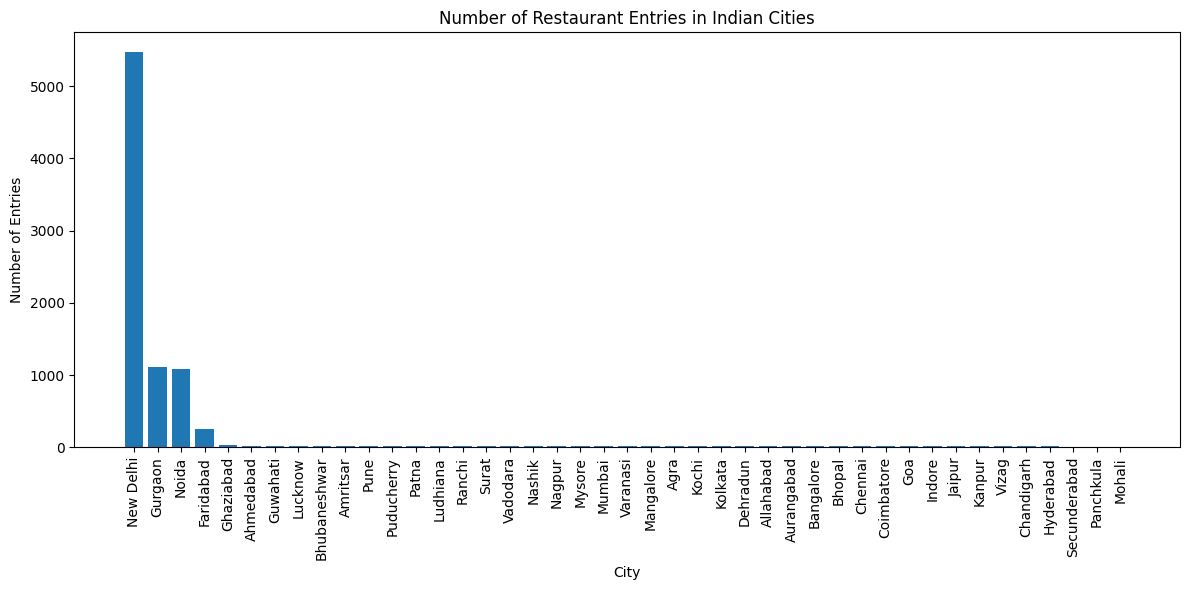

In [26]:
# prompt: represent in bar graph in all the numbers of entries with respect to individual city

city_counts = dtf_india_cleaned['City'].value_counts()

# Create the bar graph
plt.figure(figsize=(12, 6))
plt.bar(city_counts.index, city_counts.values)
plt.xlabel('City')
plt.ylabel('Number of Entries')
plt.title('Number of Restaurant Entries in Indian Cities')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()

In [27]:
# prompt: create a table carring list of all cities and number of respective entries in it.

# Assuming dtf_india_cleaned is your DataFrame
city_entry_counts = dtf_india_cleaned['City'].value_counts().reset_index()
city_entry_counts.columns = ['City', 'Number of Entries']

# Display the table
city_entry_counts

,City,Number of Entries
0,New Delhi,5473
1,Gurgaon,1118
2,Noida,1080
3,Faridabad,251
4,Ghaziabad,25
5,Ahmedabad,21
6,Guwahati,21
7,Lucknow,21
8,Bhubaneshwar,21
9,Amritsar,21


In [28]:
import plotly.express as px

#setting up mapbox token
mapbox_access_token = "pk.eyJ1Ijoic2FnYXJsaW1idTAiLCJhIjoiY2t2MXhhMm5mNnE5ajJ3dDl2eDZvNTM2NiJ9.1bwmb8HPgFZWwR8kcO5rOA"
px.set_mapbox_access_token(mapbox_access_token)

# Create a map with the restaurant locations using longitude and latitude
fig = px.scatter_mapbox(
    dtf_india_cleaned,
    lat="Latitude",
    lon="Longitude",
    hover_name="Restaurant Name",  # Hover info to show restaurant names
    hover_data=["Cuisines", "Average Cost for two", "Aggregate rating"],
    color_discrete_sequence=["blue"],  # Set color for the points
    zoom=5,  # Initial zoom level
    height=600  # Height of the map
)

# Set the layout for the map
fig.update_layout(
    mapbox_style="streets",  # Choose map style (other options: 'satellite', 'outdoors', etc.)
    title="Restaurant Locations in India",
    margin={"r":0,"t":40,"l":0,"b":0}
)

# Display the map
fig.show()

In [29]:
# Filter the dataset for New Delhi, Gurgaon, and Noida
cities_of_interest = ['New Delhi', 'Gurgaon', 'Noida']
zomato_data_selected_cities = dtf_india_cleaned[dtf_india_cleaned['City'].isin(cities_of_interest)]

# Reset the index after filtering
zomato_data_selected_cities = zomato_data_selected_cities.reset_index(drop=True)

# Display the number of entries for the selected cities
print(f"Number of entries for the selected cities: {len(zomato_data_selected_cities)}")
print(zomato_data_selected_cities['City'].value_counts())


Number of entries for the selected cities: 7671
City
New Delhi    5473
Gurgaon      1118
Noida        1080
Name: count, dtype: int64


In [30]:
zomato_data_selected_cities.head()

,Restaurant ID,Restaurant Name,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Price range,Aggregate rating,Rating text,Votes
0,18396451,K Lab,Gurgaon,"Shop GF-18, ILD Trade Centre, Sector 47, Near ...","ILD Trade Centre Mall, Sohna Road","ILD Trade Centre Mall, Sohna Road, Gurgaon",77.039310,28.424831,"Cafe, Beverages",350,Indian Rupees(Rs.),1,3.4,Average,16
1,18237941,Pind Balluchi,Gurgaon,"112/112-A, 1st Floor, ILD Trade Centre, Near S...","ILD Trade Centre Mall, Sohna Road","ILD Trade Centre Mall, Sohna Road, Gurgaon",77.039220,28.424913,"North Indian, Mughlai",800,Indian Rupees(Rs.),2,2.7,Average,80
2,2787,Punjab Grill,Gurgaon,"3rd Floor, Ambience Mall, Gurgaon","Ambience Mall, Gurgaon","Ambience Mall, Gurgaon, Gurgaon",77.097118,28.503077,"North Indian, Mughlai",2000,Indian Rupees(Rs.),4,4.3,Very Good,1887
3,3431,Zambar,Gurgaon,"3rd Floor, Ambience Mall, Gurgaon","Ambience Mall, Gurgaon","Ambience Mall, Gurgaon, Gurgaon",77.097185,28.502613,"South Indian, Seafood, Kerala",1400,Indian Rupees(Rs.),3,4.0,Very Good,802
4,303699,Cakes & More,Gurgaon,"27, Ground Floor, Ansal Plaza Mall, Palam Viha...","Ansal Plaza Mall, Palam Vihar","Ansal Plaza Mall, Palam Vihar, Gurgaon",77.042009,28.511416,Bakery,250,Indian Rupees(Rs.),1,3.0,Average,4


In [31]:
# from google.colab import sheets
# sheet = sheets.InteractiveSheet(df=zomato_data_selected_cities)

In [32]:
zomato_data_selected_cities.shape

(7671, 15)

In [33]:
# Filter out the entries where both Longitude and Latitude are 0
zero_location_entries = zomato_data_selected_cities[(zomato_data_selected_cities['Longitude'] == 0) &
                                                    (zomato_data_selected_cities['Latitude'] == 0)]

# Display the restaurant name and city for the entries with 0 longitude and latitude
zero_location_list = zero_location_entries[['Restaurant Name', 'City']]

# Show the list
print("Restaurants with no Longitude and Latitude:")
print(zero_location_list)


Restaurants with 0 Longitude and Latitude:
                 Restaurant Name     City
18               Late Night Food  Gurgaon
25        Tanishk Gourmet Indian  Gurgaon
165                  Chefoncalls  Gurgaon
167                    Good Food  Gurgaon
168              Mahek By Greenz  Gurgaon
...                          ...      ...
7555               Kake Da Dhaba    Noida
7559           Mr. Biryani Walia    Noida
7587            Midnight Foodies    Noida
7603                       Balti    Noida
7657  Chef's Basket Pop Up Cafí©    Noida

[374 rows x 2 columns]


In [34]:
import plotly.express as px

# Filtered dataset zomato_data_selected_cities already contains only New Delhi, Gurgaon, and Noida restaurants
# Make sure 'Longitude' and 'Latitude' columns are present and properly filled
if zomato_data_selected_cities['Longitude'].isnull().sum() == 0 and zomato_data_selected_cities['Latitude'].isnull().sum() == 0:

    # Create the map
    fig = px.scatter_mapbox(
        zomato_data_selected_cities,
        lat="Latitude",
        lon="Longitude",
        hover_name="Restaurant Name",
        hover_data=["Address", "Cuisines", "Aggregate rating"],
        color="City",  # Color restaurants based on the city
        zoom=10,  # Adjust zoom to focus on New Delhi, Gurgaon, Noida
        height=600,  # Map height
        title="Restaurants in New Delhi, Gurgaon, and Noida"
    )

    # Customize the layout of the map
    fig.update_layout(
        mapbox_style="streets",  # You can use other styles like 'open-street-map', 'satellite', etc.
        mapbox_accesstoken="pk.eyJ1Ijoic2FnYXJsaW1idTAiLCJhIjoiY2t2MXhhMm5mNnE5ajJ3dDl2eDZvNTM2NiJ9.1bwmb8HPgFZWwR8kcO5rOA",
        mapbox_center={"lat": 28.6139, "lon": 77.2090},  # Center on Delhi (with Gurgaon and Noida in range)
        margin={"r": 0, "t": 50, "l": 0, "b": 0},
        title_font_size=20
    )

    # Show the map
    fig.show()
else:
    print("Error: Some entries are missing Latitude or Longitude values.")


In [35]:
import pandas as pd
from geopy.distance import geodesic

user_location = (28.6139, 77.2090)  # User's location (latitude, longitude), here set as New Delhi
user_preferred_cuisines = ["North Indian", "Chinese"]  # User's preferred cuisines

def recommend_restaurants(user_location, user_preferred_cuisines, df, top_n=5):
    # Filter the dataset based on cuisine preferences
    filtered_df = df[df['Cuisines'].apply(lambda x: any(cuisine in x for cuisine in user_preferred_cuisines))]

    # Calculate distance for each restaurant from user's location
    filtered_df['Distance'] = filtered_df.apply(
        lambda row: geodesic(user_location, (row['Latitude'], row['Longitude'])).kilometers, axis=1
    )

    # Sort by rating (descending) and then by distance (ascending)
    recommended_df = filtered_df.sort_values(by=['Aggregate rating', 'Distance'], ascending=[False, True])

    # Return top N recommended restaurants
    return recommended_df.head(top_n)[['Restaurant Name', 'Address', 'Cuisines', 'Aggregate rating', 'Distance']]

# Using the function with zomato_data_selected_cities dataset
recommended_restaurants = recommend_restaurants(user_location, user_preferred_cuisines, zomato_data_selected_cities)

# Display the recommendations
print(recommended_restaurants)


               Restaurant Name  \
5214              Kopper Kadai   
678                  Prankster   
677                   Matchbox   
1572  Zabardast Indian Kitchen   
5555       Echoes Satyaniketan   

                                                Address  \
5214  J2/6B, 1st & 2nd Floor, B.K. Dutta Market, Raj...   
678                       Site 8-10, Sector 29, Gurgaon   
677                30, Ground Floor, Sector 29, Gurgaon   
1572  E-13/29, Ground Floor, Middle Circle, Connaugh...   
5555  17, 1st Floor, Opposite Sri Venkateshwara Coll...   

                                               Cuisines  Aggregate rating  \
5214                                       North Indian               4.8   
678                         Modern Indian, North Indian               4.8   
677                  Continental, North Indian, Chinese               4.8   
1572                                       North Indian               4.7   
5555  Cafe, Continental, Italian, Mexican, Chinese, ...

<ipython-input-35-f0bdc199dd3c>:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [47]:
import numpy as np

# Replace 0s with NaN
zomato_data_selected_cities[['Longitude', 'Latitude']] = zomato_data_selected_cities[['Longitude', 'Latitude']].replace(0, np.nan)

# Calculate the mean Longitude and Latitude for each locality
locality_coords = zomato_data_selected_cities.groupby('Locality')[['Longitude', 'Latitude']].mean()

# Define a function to fill missing coordinates
def fill_missing_coords(row):
    if pd.isnull(row['Longitude']) or pd.isnull(row['Latitude']):
        if row['Locality'] in locality_coords.index:
            row['Longitude'] = locality_coords.loc[row['Locality'], 'Longitude']
            row['Latitude'] = locality_coords.loc[row['Locality'], 'Latitude']
    return row

# Apply and re-assign the function to fill missing coordinates
zomato_data_selected_cities = zomato_data_selected_cities.apply(fill_missing_coords, axis=1)

# Check if any entries still have missing values
print(zomato_data_selected_cities[['Longitude', 'Latitude']].isnull().sum())


Longitude    4
Latitude     4
dtype: int64


In [45]:
zomato_data_selected_cities.head()

,Restaurant ID,Restaurant Name,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Price range,Aggregate rating,Rating text,Votes
0,18396451,K Lab,Gurgaon,"Shop GF-18, ILD Trade Centre, Sector 47, Near ...","ILD Trade Centre Mall, Sohna Road","ILD Trade Centre Mall, Sohna Road, Gurgaon",77.039310,28.424831,"Cafe, Beverages",350,Indian Rupees(Rs.),1,3.4,Average,16
1,18237941,Pind Balluchi,Gurgaon,"112/112-A, 1st Floor, ILD Trade Centre, Near S...","ILD Trade Centre Mall, Sohna Road","ILD Trade Centre Mall, Sohna Road, Gurgaon",77.039220,28.424913,"North Indian, Mughlai",800,Indian Rupees(Rs.),2,2.7,Average,80
2,2787,Punjab Grill,Gurgaon,"3rd Floor, Ambience Mall, Gurgaon","Ambience Mall, Gurgaon","Ambience Mall, Gurgaon, Gurgaon",77.097118,28.503077,"North Indian, Mughlai",2000,Indian Rupees(Rs.),4,4.3,Very Good,1887
3,3431,Zambar,Gurgaon,"3rd Floor, Ambience Mall, Gurgaon","Ambience Mall, Gurgaon","Ambience Mall, Gurgaon, Gurgaon",77.097185,28.502613,"South Indian, Seafood, Kerala",1400,Indian Rupees(Rs.),3,4.0,Very Good,802
4,303699,Cakes & More,Gurgaon,"27, Ground Floor, Ansal Plaza Mall, Palam Viha...","Ansal Plaza Mall, Palam Vihar","Ansal Plaza Mall, Palam Vihar, Gurgaon",77.042009,28.511416,Bakery,250,Indian Rupees(Rs.),1,3.0,Average,4


In [46]:
from google.colab import sheets
sheet = sheets.InteractiveSheet(df=zomato_data_selected_cities)

https://docs.google.com/spreadsheets/d/1Ekm-oDmpGi9i9bJW2TH6AksChELyWbiNALkLmDniTCY#gid=0


/usr/local/lib/python3.10/dist-packages/google/colab/sheets.py:31: FutureWarning:

DataFrame.applymap has been deprecated. Use DataFrame.map instead.



In [44]:
# Filter entries where either Longitude or Latitude is 0
entries_with_zero_coords = zomato_data_selected_cities[
    (zomato_data_selected_cities['Longitude'] == 0) | (zomato_data_selected_cities['Latitude'] == 0)
]

# Display the entries
print(f"Number of entries with zero coordinates: {len(entries_with_zero_coords)}")
print(entries_with_zero_coords)


Number of entries with zero coordinates: 0
Empty DataFrame
Columns: [Restaurant ID, Restaurant Name, City, Address, Locality, Locality Verbose, Longitude, Latitude, Cuisines, Average Cost for two, Currency, Price range, Aggregate rating, Rating text, Votes]
Index: []


In [48]:
# Filter entries where either Longitude or Latitude is NaN
entries_with_nan_coords = zomato_data_selected_cities[
    zomato_data_selected_cities['Longitude'].isna() | zomato_data_selected_cities['Latitude'].isna()
]

# Display the entries
print(f"Number of entries with NaN coordinates: {len(entries_with_nan_coords)}")
print(entries_with_nan_coords)


Number of entries with NaN coordinates: 4
      Restaurant ID Restaurant Name       City  \
1118       18287358      Food Cloud  New Delhi   
2020         311712      Wah Ji Wah  New Delhi   
6109       18459030    Chatori Gali  New Delhi   
6764       18430587     Malt n Brew      Noida   

                                                Address  \
1118                              Aaya Nagar, New Delhi   
2020  E-6, Jyoti Colony, 100 Feet Road, Durga Puri, ...   
6109  Central Hall, Patiala House Court, Tilak Marg,...   
6764  Park Ascent, Plot 126, Noida Khoda Road, Oppos...   

                           Locality                      Locality Verbose  \
1118                     Aaya Nagar                 Aaya Nagar, New Delhi   
2020                     Durga Puri                 Durga Puri, New Delhi   
6109                     Tilak Marg                 Tilak Marg, New Delhi   
6764  Park Ascent, Sector 62, Noida  Park Ascent, Sector 62, Noida, Noida   

      Longitude  Latitude

In [49]:
zomato_data_selected_cities.shape

(7671, 15)

In [50]:
# Remove entries with NaN values in either Longitude or Latitude
zomato_data_selected_cities = zomato_data_selected_cities.dropna(subset=['Longitude', 'Latitude'])

# Verify removal
print(f"Number of entries after removal: {len(zomato_data_selected_cities)}")
print(zomato_data_selected_cities[['Longitude', 'Latitude']].isnull().sum())


Number of entries after removal: 7667
Longitude    0
Latitude     0
dtype: int64


In [51]:

# # Set your Mapbox access token
# mapbox_access_token = "pk.eyJ1Ijoic2FnYXJsaW1idTAiLCJhIjoiY2t2MXhhMm5mNnE5ajJ3dDl2eDZvNTM2NiJ9.1bwmb8HPgFZWwR8kcO5rOA"

# Create a Plotly scatter mapbox
fig = px.scatter_mapbox(
    zomato_data_selected_cities,
    lat="Latitude",
    lon="Longitude",
    hover_name="Restaurant Name",
    hover_data={"Locality": True, "Average Cost for two": True, "Aggregate rating": True},
    color="City",
    zoom=10,  # Set initial zoom level
    height=600
)

# Customize the map layout to focus on New Delhi, Gurgaon, and Noida area
fig.update_layout(
    mapbox=dict(
        accesstoken=mapbox_access_token,
        center=dict(lat=28.6139, lon=77.2090),  # Center around Delhi area
        zoom=10
    ),
    title="Restaurant Locations in New Delhi, Gurgaon, and Noida"
)

# Show the map
fig.show()


In [52]:

# User's location and cuisine preferences
user_location = (28.6139, 77.2090)  # Example location in New Delhi
user_preferred_cuisines = ["North Indian", "Chinese"]  # Example preferences

# Define a function to recommend restaurants
def recommend_restaurants(user_location, user_preferred_cuisines, df, top_n=5):
    # Filter based on user's preferred cuisines
    filtered_df = df[df['Cuisines'].apply(lambda x: any(cuisine in x for cuisine in user_preferred_cuisines))]

    # Calculate the distance to each restaurant
    filtered_df['Distance'] = filtered_df.apply(
        lambda row: geodesic(user_location, (row['Latitude'], row['Longitude'])).kilometers, axis=1
    )

    # Sort by rating and then by distance
    recommended_df = filtered_df.sort_values(by=['Aggregate rating', 'Distance'], ascending=[False, True])

    # Return top N recommendations
    return recommended_df.head(top_n)[['Restaurant Name', 'Address', 'Cuisines', 'Aggregate rating', 'Distance', 'Latitude', 'Longitude']]

# Get recommended restaurants using zomato_data_selected_cities dataset
recommended_restaurants = recommend_restaurants(user_location, user_preferred_cuisines, zomato_data_selected_cities)

# Map visualization of the recommendations
mapbox_access_token = "pk.eyJ1Ijoic2FnYXJsaW1idTAiLCJhIjoiY2t2MXhhMm5mNnE5ajJ3dDl2eDZvNTM2NiJ9.1bwmb8HPgFZWwR8kcO5rOA"

# Plot the recommendations on a map
fig = px.scatter_mapbox(
    recommended_restaurants,
    lat="Latitude",
    lon="Longitude",
    hover_name="Restaurant Name",
    hover_data={"Address": True, "Cuisines": True, "Aggregate rating": True, "Distance": True},
    color="Aggregate rating",
    color_continuous_scale="Viridis",
    zoom=12,
    height=600
)

# Add user's location as a separate trace
fig.add_scattermapbox(
    lat=[user_location[0]],
    lon=[user_location[1]],
    mode="markers",
    marker=dict(size=15, color="red", symbol="star"),
    name="User Location"
)

# Set Mapbox layout
fig.update_layout(
    mapbox=dict(
        accesstoken=mapbox_access_token,
        center=dict(lat=user_location[0], lon=user_location[1]),
        zoom=12
    ),
    title="Recommended Restaurants Near You"
)

# Show the map
fig.show()


<ipython-input-52-53072d86585f>:15: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [55]:
import pandas as pd
import plotly.express as px
from geopy.distance import geodesic

# User details
user_location = (28.6139, 77.2090)  # User's location set to New Delhi
user_preferred_cuisines = ["North Indian", "Chinese"]  # User's preferred cuisines

# Function to recommend restaurants
def recommend_restaurants(user_location, user_preferred_cuisines, df, top_n=5):
    # Filter based on cuisine preferences
    filtered_df = df[df['Cuisines'].apply(lambda x: any(cuisine in x for cuisine in user_preferred_cuisines))]

    # Calculate distance from user's location
    filtered_df['Distance'] = filtered_df.apply(
        lambda row: geodesic(user_location, (row['Latitude'], row['Longitude'])).kilometers, axis=1
    )

    # Sort by rating and then by distance
    recommended_df = filtered_df.sort_values(by=['Aggregate rating', 'Distance'], ascending=[False, True])

    # Return top N recommendations
    return recommended_df.head(top_n)[['Restaurant Name', 'Address', 'Cuisines', 'Aggregate rating', 'Distance', 'Latitude', 'Longitude']]

# Get recommended restaurants
recommended_restaurants = recommend_restaurants(user_location, user_preferred_cuisines, zomato_data_selected_cities)

# Print the recommendations list
print("Top Recommended Restaurants:\n", recommended_restaurants[['Restaurant Name', 'Address', 'Cuisines', 'Aggregate rating', 'Distance']])

# Plotting the map
mapbox_access_token = "pk.eyJ1Ijoic2FnYXJsaW1idTAiLCJhIjoiY2t2MXhhMm5mNnE5ajJ3dDl2eDZvNTM2NiJ9.1bwmb8HPgFZWwR8kcO5rOA"

# Scatter mapbox for visualization
fig = px.scatter_mapbox(
    recommended_restaurants,
    lat="Latitude",
    lon="Longitude",
    hover_name="Restaurant Name",
    hover_data={"Address": True, "Cuisines": True, "Aggregate rating": True, "Distance": True},
    color="Aggregate rating",
    size="Aggregate rating",
    color_continuous_scale="Viridis",
    zoom=12,
    height=600
)

# Add user location marker
fig.add_scattermapbox(
    lat=[user_location[0]],
    lon=[user_location[1]],
    mode='markers+text',
    marker=dict(size=12, color='green', symbol="star"),
    text=["User Location"],
    name="User Location"
)

# Focus the map on the user's location with mapbox token
fig.update_layout(
    mapbox=dict(
        accesstoken=mapbox_access_token,
        center=dict(lat=user_location[0], lon=user_location[1]),
        zoom=12
    ),
    title="Top Recommended Restaurants in New Delhi (Based on Location and Cuisines)"
)

# Display the map
fig.show()


Top Recommended Restaurants:
                Restaurant Name  \
5214              Kopper Kadai   
678                  Prankster   
677                   Matchbox   
1572  Zabardast Indian Kitchen   
5555       Echoes Satyaniketan   

                                                Address  \
5214  J2/6B, 1st & 2nd Floor, B.K. Dutta Market, Raj...   
678                       Site 8-10, Sector 29, Gurgaon   
677                30, Ground Floor, Sector 29, Gurgaon   
1572  E-13/29, Ground Floor, Middle Circle, Connaugh...   
5555  17, 1st Floor, Opposite Sri Venkateshwara Coll...   

                                               Cuisines  Aggregate rating  \
5214                                       North Indian               4.8   
678                         Modern Indian, North Indian               4.8   
677                  Continental, North Indian, Chinese               4.8   
1572                                       North Indian               4.7   
5555  Cafe, Continental, 

<ipython-input-55-895f76e9ea3c>:15: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [54]:
import pandas as pd
from geopy.distance import geodesic
import plotly.express as px

# Define user location and preferences
user_location = (28.6139, 77.2090)  # Example: User's location (latitude, longitude), New Delhi
user_preferred_cuisines = ["North Indian", "Chinese"]  # User's preferred cuisines

# Function to recommend restaurants based on user location and preferences
def recommend_restaurants(user_location, user_preferred_cuisines, df, top_n=5):
    # Filter dataset based on user's preferred cuisines
    filtered_df = df[df['Cuisines'].apply(lambda x: any(cuisine in x for cuisine in user_preferred_cuisines))]

    # Calculate the distance for each restaurant from the user's location
    filtered_df['Distance'] = filtered_df.apply(
        lambda row: geodesic(user_location, (row['Latitude'], row['Longitude'])).kilometers, axis=1
    )

    # Sort by rating (descending) and then by distance (ascending)
    recommended_df = filtered_df.sort_values(by=['Aggregate rating', 'Distance'], ascending=[False, True])

    # Return top N recommended restaurants
    return recommended_df.head(top_n)[['Restaurant Name', 'Address', 'Cuisines', 'Aggregate rating', 'Distance', 'Latitude', 'Longitude']]

# Get the top recommended restaurants using the defined function
recommended_restaurants = recommend_restaurants(user_location, user_preferred_cuisines, zomato_data_selected_cities)
print("Recommended Restaurants:")
print(recommended_restaurants)

# Add the user's location to the map
zomato_data_selected_cities_with_user = zomato_data_selected_cities.copy()
zomato_data_selected_cities_with_user = pd.concat([
    zomato_data_selected_cities_with_user,
    pd.DataFrame([{
        'Restaurant Name': 'User Location',
        'Address': 'Current Location',
        'Cuisines': '',
        'Aggregate rating': None,
        'Distance': 0,
        'Latitude': user_location[0],
        'Longitude': user_location[1]
    }])
], ignore_index=True)

# Define mapbox access token
mapbox_access_token = "pk.eyJ1Ijoic2FnYXJsaW1idTAiLCJhIjoiY2t2MXhhMm5mNnE5ajJ3dDl2eDZvNTM2NiJ9.1bwmb8HPgFZWwR8kcO5rOA"

# Create Plotly scatter mapbox plot
fig = px.scatter_mapbox(
    zomato_data_selected_cities_with_user,
    lat="Latitude",
    lon="Longitude",
    hover_name="Restaurant Name",
    hover_data={"Address": True, "Cuisines": True, "Aggregate rating": True},
    color_discrete_sequence=["blue"],  # Set default color for other points
    zoom=10,
    height=600
)

# Highlight recommended restaurants in red
fig.add_scattermapbox(
    lat=recommended_restaurants['Latitude'],
    lon=recommended_restaurants['Longitude'],
    mode='markers+text',
    marker=dict(size=10, color='red'),
    text=recommended_restaurants['Restaurant Name'],
    name='Recommended Restaurants'
)

# Add user location marker
fig.add_scattermapbox(
    lat=[user_location[0]],
    lon=[user_location[1]],
    mode='markers+text',
    marker=dict(size=12, color='green', symbol="star"),
    text=["User Location"],
    name="User Location"
)

# Update layout with center on the user location and map settings
fig.update_layout(
    mapbox=dict(
        accesstoken=mapbox_access_token,
        center=dict(lat=user_location[0], lon=user_location[1]),  # Center on user location
        zoom=10
    ),
    title="Restaurant Recommendations Based on User Location and Preferences"
)

# Show map
fig.show()


Recommended Restaurants:
               Restaurant Name  \
5214              Kopper Kadai   
678                  Prankster   
677                   Matchbox   
1572  Zabardast Indian Kitchen   
5555       Echoes Satyaniketan   

                                                Address  \
5214  J2/6B, 1st & 2nd Floor, B.K. Dutta Market, Raj...   
678                       Site 8-10, Sector 29, Gurgaon   
677                30, Ground Floor, Sector 29, Gurgaon   
1572  E-13/29, Ground Floor, Middle Circle, Connaugh...   
5555  17, 1st Floor, Opposite Sri Venkateshwara Coll...   

                                               Cuisines  Aggregate rating  \
5214                                       North Indian               4.8   
678                         Modern Indian, North Indian               4.8   
677                  Continental, North Indian, Chinese               4.8   
1572                                       North Indian               4.7   
5555  Cafe, Continental, Itali

<ipython-input-54-e13bb2d0b1c3>:15: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-54-e13bb2d0b1c3>:32: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.

